In [1]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import re
import sys, os

this_path = '/home/ibi/Documents/GitHub/ady201m-project'
sys.path.append(this_path)
os.chdir(this_path)

In [2]:
df = pd.read_csv('data/raw/train-data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.drop('Unnamed: 0',axis = 1,inplace = True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
def get_dataframe_info(df):
    columns = df.columns
    first_non_null_values = df.apply(lambda col: col.dropna().iloc[0] if col.dropna().shape[0] > 0 else None)
    column_types = df.dtypes

    info = pd.DataFrame({
        'Column': columns,
        'First Non-Null Value': first_non_null_values,
        'Type': column_types
    }).reset_index(drop=True)

    return info

info = get_dataframe_info(df)
info

,Column,First Non-Null Value,Type
0,Name,Maruti Wagon R LXI CNG,object
1,Location,Mumbai,object
2,Year,2010,int64
3,Kilometers_Driven,72000,int64
4,Fuel_Type,CNG,object
5,Transmission,Manual,object
6,Owner_Type,First,object
7,Mileage,26.6 km/kg,object
8,Engine,998 CC,object
9,Power,58.16 bhp,object


In [5]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


<Axes: >

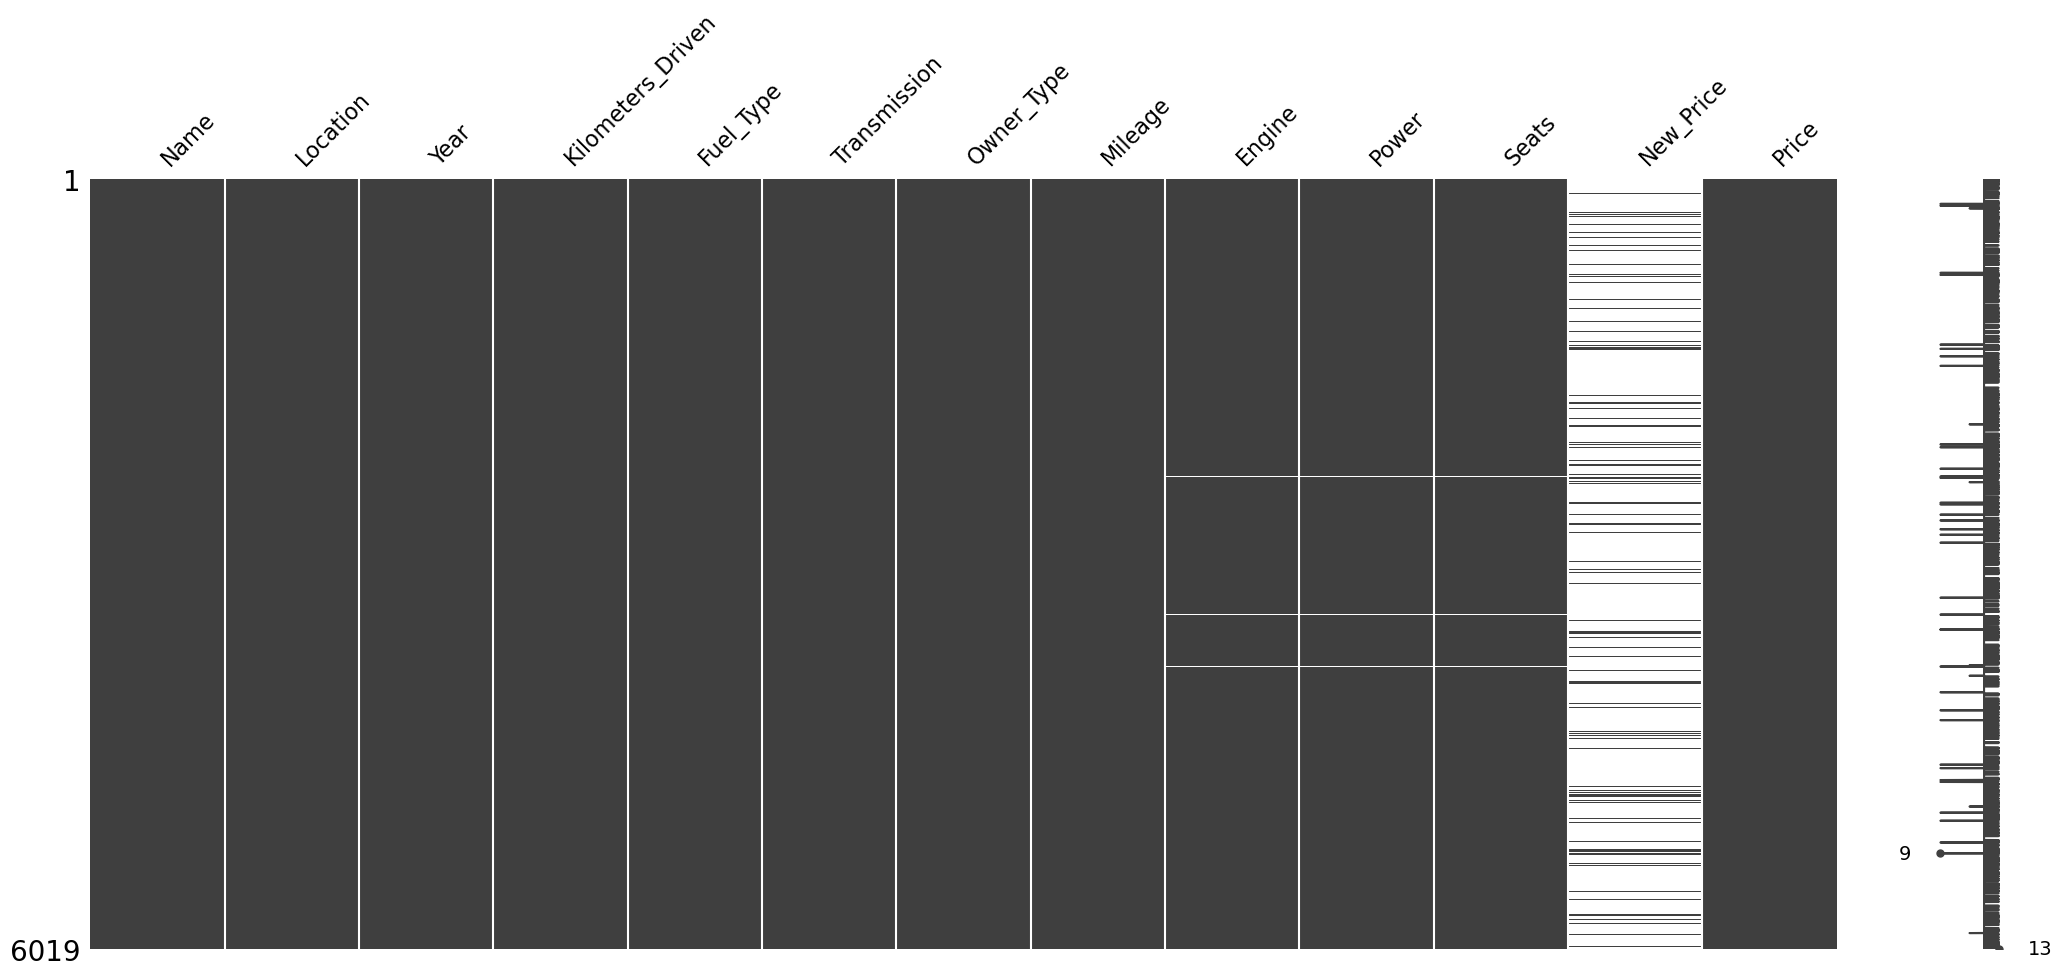

In [6]:
msno.matrix(df)

In [7]:
def get_missing_values(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing = missing.sort_values(ascending=False)
    missing = pd.DataFrame(missing, columns=['Missing Values'])
    return missing

missing = get_missing_values(df)
missing

,Missing Values
New_Price,5195
Seats,42
Engine,36
Power,36
Mileage,2


As the 'New_Price' column has too many missing values, we can just drop the whole column.

In [8]:
df.drop(['New_Price'], axis=1, inplace=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


For milleage, we can fill the missing values with the median of the column. But first we need to unify the units.

In [9]:
kmkg = 0
kmpl = 0
for i in df.Mileage:
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
print(f'Rows with km/kg: {kmkg}')
print(f'Rows with kmpl: {kmpl}')

Rows with km/kg: 66
Rows with kmpl: 5951


Fewer km/kg than kmpl, so we will convert all values to kmpl.

In [10]:
def convert_mileage(mileage):
    if pd.isna(mileage):
        return None
    value, unit = mileage.split()
    if unit == 'km/kg':
        value = float(value) * 1.4
    return float(value)

In [11]:
df['Mileage'] = df['Mileage'].apply(convert_mileage)
df.rename(columns={'Mileage':'Mileage(kmpl)'}, inplace=True)
print(df['Mileage(kmpl)'].dtype)
df[['Mileage(kmpl)']].head()

float64


,Mileage(kmpl)
0,37.24
1,19.67
2,18.20
3,20.77
4,15.20


Same for other columns.

In [12]:
def convert_engine(engine):
    if pd.isna(engine):
        return None
    value, unit = engine.split()
    return int(value)

In [13]:
def convert_power(power):
    if pd.isna(power) or power == 'null bhp':
        return None
    value, unit = power.split()
    return float(value)

In [14]:
df['Engine'] = df['Engine'].apply(convert_engine).astype('Int64')
df['Power'] = df['Power'].apply(convert_power)
df.rename(columns={'Engine': 'Engine (CC)', 'Power': 'Power (bhp)'}, inplace=True)

In [15]:
print(df['Engine (CC)'].dtype)
df[['Engine (CC)']].head()

Int64


,Engine (CC)
0,998
1,1582
2,1199
3,1248
4,1968


In [16]:
print(df['Power (bhp)'].dtype)
df[['Power (bhp)']].head()

float64


,Power (bhp)
0,58.16
1,126.20
2,88.70
3,88.76
4,140.80


We can use KNN to get the missing values for the rest missing columns.

In [17]:
imputer = KNNImputer()

processing_columns = ['Mileage(kmpl)', 'Engine (CC)', 'Power (bhp)', 'Seats']

for column in processing_columns:
    df[column] = df[column].apply(lambda x: np.nan if x == 0 else x)

df[processing_columns] = imputer.fit_transform(df[processing_columns])

df['Engine (CC)'] = df['Engine (CC)'].round().astype('int64')

zero_values = df[processing_columns].eq(0).sum().loc[lambda x: x > 0].to_frame('Zero Values')
zero_values

,Zero Values


In [18]:
missing = get_missing_values(df)
missing

,Missing Values


In [19]:
df = df.drop_duplicates()

In [20]:
df['Automaker'] = df['Name'].apply(lambda x: x.split()[0])
df = df[['Name', 'Automaker'] + [col for col in df.columns if col not in ['Name', 'Automaker']]]

In [21]:
info = get_dataframe_info(df)
info

,Column,First Non-Null Value,Type
0,Name,Maruti Wagon R LXI CNG,object
1,Automaker,Maruti,object
2,Location,Mumbai,object
3,Year,2010,int64
4,Kilometers_Driven,72000,int64
5,Fuel_Type,CNG,object
6,Transmission,Manual,object
7,Owner_Type,First,object
8,Mileage(kmpl),37.24,float64
9,Engine (CC),998,int64


In [22]:
df.describe()

,Year,Kilometers_Driven,Mileage(kmpl),Engine (CC),Power (bhp),Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.432378,1620.939359,112.757725,5.279129,9.479468
std,3.269742,9.126884e+04,4.489101,600.748742,53.753960,0.804914,11.187917
min,1998.000000,1.710000e+02,6.400000,72.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,15.300000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.230000,1493.000000,93.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,46.956000,5998.000000,560.000000,10.000000,160.000000


In [23]:
df.describe(include='O').T

,count,unique,top,freq
Name,6019,1876,Mahindra XUV500 W8 2WD,49
Automaker,6019,31,Maruti,1211
Location,6019,11,Mumbai,790
Fuel_Type,6019,5,Diesel,3205
Transmission,6019,2,Manual,4299
Owner_Type,6019,4,First,4929


In [24]:
df.to_csv('data/processed/train-data-cleaned.csv', index=False)